<a href="https://colab.research.google.com/github/KiranAI887/Loan-Approval-Prediction/blob/main/project5_Loan_approval_Prediction5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Dataset.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

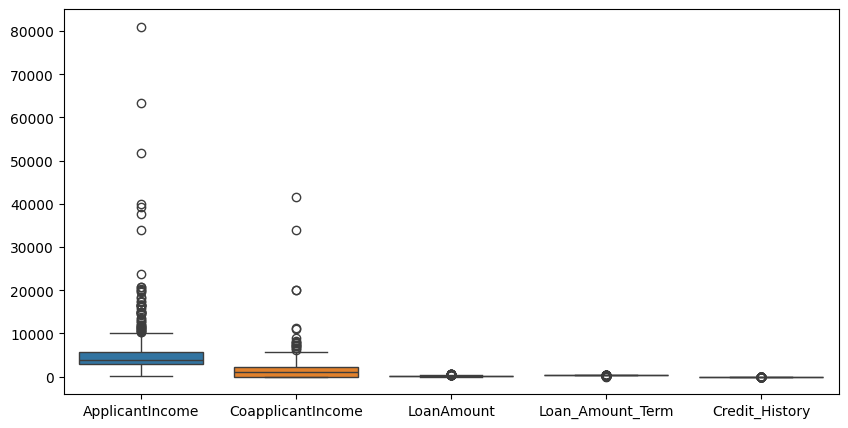

In [ ]:
## Checking the outliers
plt.figure(figsize=(10,5))
sns.boxplot(data = df)

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [ ]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Number of people who took loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

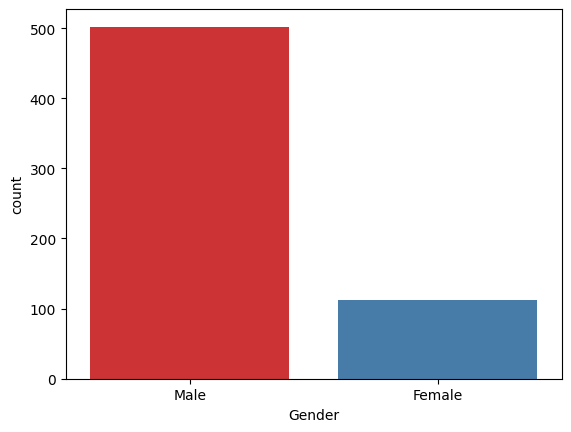

In [ ]:
print('Number of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set1')

Number of people who took loan by Married
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

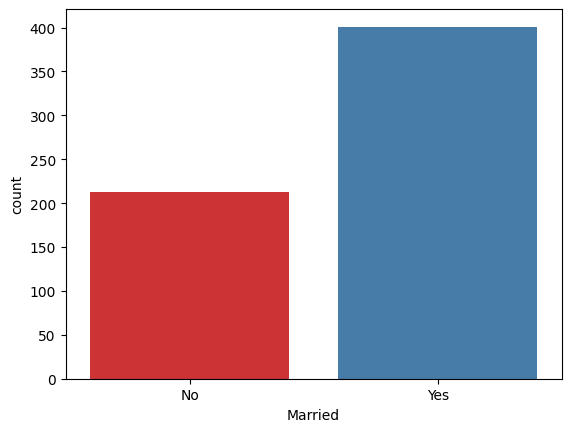

In [ ]:
print('Number of people who took loan by Married')
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

In [ ]:
## Total applicant income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

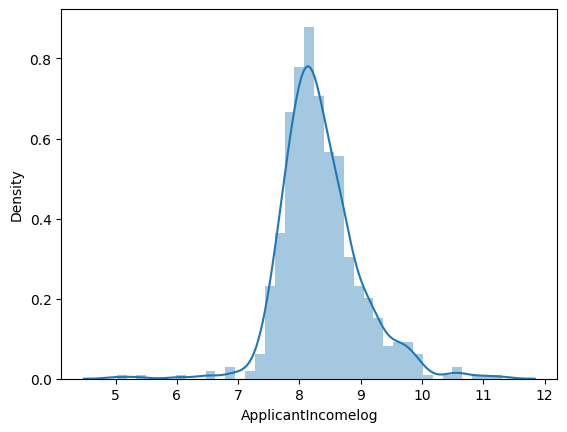

In [ ]:
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncomelog'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

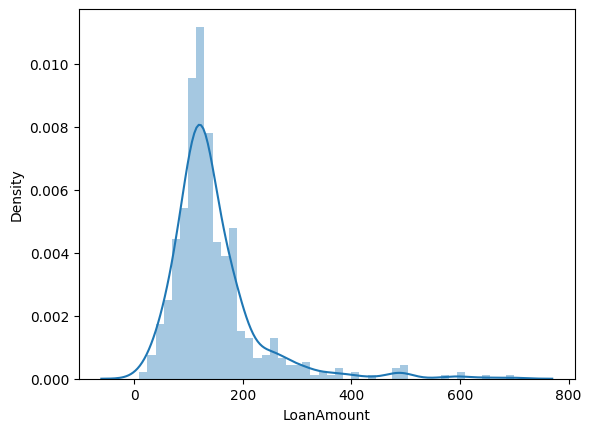

In [ ]:
sns.distplot(df['LoanAmount'])

<Axes: xlabel='LoanAmountlog', ylabel='Density'>

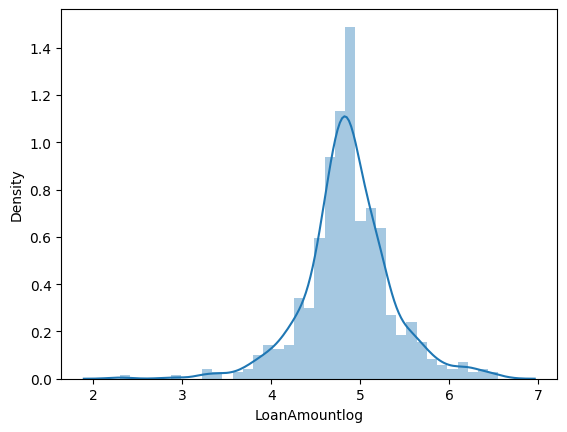

In [ ]:
df['LoanAmountlog'] = np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmountlog'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

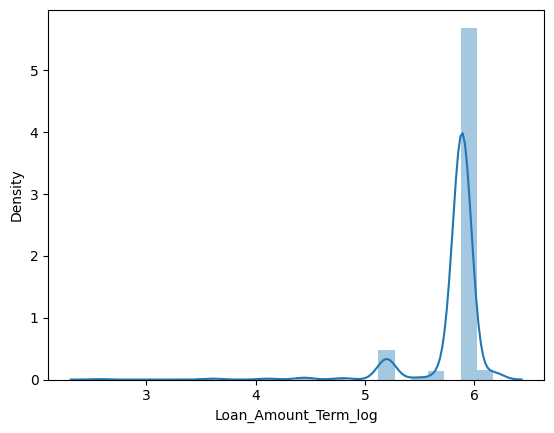

In [ ]:
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['Loan_Amount_Term_log'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

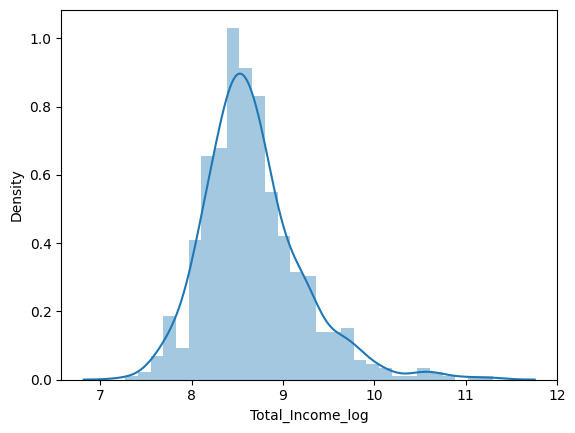

In [ ]:
df['Total_Income_log'] = np.log(df['Total_Income']+1)
sns.distplot(df['Total_Income_log'])

In [ ]:
## Drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns=cols,axis=1)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [ ]:
## Encoding
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [ ]:
df.dtypes

,0
Gender,int64
Married,int64
Dependents,object
Education,int64
Self_Employed,int64
Credit_History,float64
Property_Area,int64
Loan_Status,int64
ApplicantIncomelog,float64
LoanAmountlog,float64


In [ ]:
df['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3+,51


In [ ]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
df['Dependents'] = pd.to_numeric(df['Dependents'],errors = 'coerce')

In [ ]:
df['Dependents'] = df['Dependents'].fillna(0).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    int64  
 1   Married               614 non-null    int64  
 2   Dependents            614 non-null    int64  
 3   Education             614 non-null    int64  
 4   Self_Employed         614 non-null    int64  
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    int64  
 7   Loan_Status           614 non-null    int64  
 8   ApplicantIncomelog    614 non-null    float64
 9   LoanAmountlog         614 non-null    float64
 10  Loan_Amount_Term_log  614 non-null    float64
 11  Total_Income_log      614 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


In [ ]:
df['Dependents'].unique()

array([0, 1, 2])

In [ ]:
## split Independent and dependent features.
X = df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']

In [ ]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
## Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
Accuracy = accuracy_score(y_test,y_pred)


In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.39      0.55        54\n           1       0.75      0.98      0.85       100\n\n    accuracy                           0.77       154\n   macro avg       0.83      0.68      0.70       154\nweighted avg       0.81      0.77      0.74       154\n'

In [ ]:
Accuracy

0.7727272727272727

In [ ]:
## Accuracy : The ratio of the correctly predicted values to the total values

In [ ]:
score = cross_val_score(lr,X,y,cv=5)

In [ ]:
score.mean()

0.809462881514061

In [ ]:
## Decision Tree Classifier
DTC= DecisionTreeClassifier()
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)
Accuracy = accuracy_score(y_pred,y_test)

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.63      0.57      0.60        54\n           1       0.78      0.82      0.80       100\n\n    accuracy                           0.73       154\n   macro avg       0.71      0.70      0.70       154\nweighted avg       0.73      0.73      0.73       154\n'

In [ ]:
Accuracy

0.7077922077922078

In [ ]:
score = cross_val_score(DTC,X,y,cv=5)
print(score.mean())

0.7247767559642809


In [ ]:
##RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)
Accuracy = accuracy_score(y_test,y_pred)


In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.41      0.56        54\n           1       0.75      0.97      0.85       100\n\n    accuracy                           0.77       154\n   macro avg       0.82      0.69      0.70       154\nweighted avg       0.80      0.77      0.75       154\n'

In [ ]:
print(Accuracy)

0.7662337662337663


In [ ]:
score = cross_val_score(RFC,X,y,cv=5)
print(score.mean())

0.7817406370785018


In [ ]:
## KNN CLASSIFIER

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
Accuracy = accuracy_score(y_test,y_pred)

In [ ]:
Accuracy

0.7012987012987013

In [ ]:
score = cross_val_score(knn,X,y,cv=5)
print(score.mean())

0.750806344129015


In [ ]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
1,422
0,192


In [ ]:
## Balancing data
!pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversample = RandomOverSampler(random_state=42)
X_resampled,y_resampled = oversample.fit_resample(X,y)
df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=X.columns),pd.Series(y_resampled,name='Loan_status')],axis=1)


In [ ]:
X_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,0,1,0,1.0,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,1.0,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.0,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.0,2,7.969012,3.828641,5.198497,7.969012


In [ ]:
y_resampled.value_counts()

,count
Loan_Status,
1,422
0,422


In [ ]:
X_resampled_train, X_resampled_test,y_resampled_train,y_resampled_test = train_test_split(X_resampled,y_resampled,test_size=0.25,random_state=42)

In [ ]:
## Logistic Regression
lr = LogisticRegression()
lr.fit(X_resampled_train,y_resampled_train)
y_pred = lr.predict(X_resampled_test)
Accuracy = accuracy_score(y_resampled_test,y_pred)

In [ ]:
Accuracy

0.6777251184834123

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_resampled_train,y_resampled_train)
y_pred = RFC.predict(X_resampled_test)
Accuracy = accuracy_score(y_resampled_test,y_pred)

In [ ]:
Accuracy

0.8862559241706162